In [1]:
import numpy as np
import pandas as pd
import os

In [28]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [29]:
# Set the seed for reproducibility
seed = 42
np.random.seed(seed)

In [30]:
# Define directories and parameters
base_dir = 'PetImages'
cat_dir = os.path.join(base_dir, 'Cat')
dog_dir = os.path.join(base_dir, 'Dog')

In [31]:
# Split data into train and test sets
cat_files = os.listdir(cat_dir)
dog_files = os.listdir(dog_dir)

random.shuffle(cat_files)
random.shuffle(dog_files)

In [32]:
split_ratio = 0.8  # 80% for training, 20% for testing
cat_train_size = int(split_ratio * len(cat_files))
dog_train_size = int(split_ratio * len(dog_files))

In [33]:
cat_train_files, cat_test_files = cat_files[:cat_train_size], cat_files[cat_train_size:]
dog_train_files, dog_test_files = dog_files[:dog_train_size], dog_files[dog_train_size:]

In [34]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [35]:
for file in cat_train_files:
    src_path = os.path.join(cat_dir, file)
    dst_path = os.path.join(train_dir, 'cat', file)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    os.rename(src_path, dst_path)

In [36]:
for file in dog_train_files:
    src_path = os.path.join(dog_dir, file)
    dst_path = os.path.join(train_dir, 'dog', file)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    os.rename(src_path, dst_path)

In [37]:
for file in cat_test_files:
    src_path = os.path.join(cat_dir, file)
    dst_path = os.path.join(test_dir, 'cat', file)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    os.rename(src_path, dst_path)

In [38]:
for file in dog_test_files:
    src_path = os.path.join(dog_dir, file)
    dst_path = os.path.join(test_dir, 'dog', file)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    os.rename(src_path, dst_path)

In [39]:
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 19966 images belonging to 2 classes.
Found 4993 images belonging to 2 classes.


In [41]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Visualize training history
plt.figure(figsize=(12, 4))

Epoch 1/10
594/624 [===========================>..] - ETA: 17s - loss: 0.6422 - accuracy: 0.6255

G:\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 [==============================] - 395s 632ms/step - loss: 0.6389 - accuracy: 0.6291 - val_loss: 0.5589 - val_accuracy: 0.7172
Epoch 2/10
624/624 [==============================] - 415s 665ms/step - loss: 0.5127 - accuracy: 0.7422 - val_loss: 0.4864 - val_accuracy: 0.7645
Epoch 3/10
256/624 [===========>..................] - ETA: 3:47 - loss: 0.4539 - accuracy: 0.7834

G:\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 [==============================] - 409s 655ms/step - loss: 0.4499 - accuracy: 0.7880 - val_loss: 0.4146 - val_accuracy: 0.8033
Epoch 4/10
624/624 [==============================] - 409s 656ms/step - loss: 0.4106 - accuracy: 0.8117 - val_loss: 0.3665 - val_accuracy: 0.8376
Epoch 5/10
624/624 [==============================] - 405s 650ms/step - loss: 0.3711 - accuracy: 0.8335 - val_loss: 0.3491 - val_accuracy: 0.8456
Epoch 6/10
624/624 [==============================] - 404s 647ms/step - loss: 0.3399 - accuracy: 0.8475 - val_loss: 0.3281 - val_accuracy: 0.8494
Epoch 7/10
624/624 [==============================] - 401s 643ms/step - loss: 0.3153 - accuracy: 0.8607 - val_loss: 0.3595 - val_accuracy: 0.8390
Epoch 8/10
624/624 [==============================] - 401s 642ms/step - loss: 0.2881 - accuracy: 0.8774 - val_loss: 0.3188 - val_accuracy: 0.8620
Epoch 9/10
624/624 [==============================] - 405s 648ms/step - loss: 0.2667 - accuracy: 0.8851 - val_loss: 0.3252 - val_accura

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

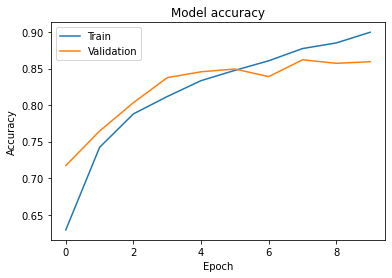

In [44]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

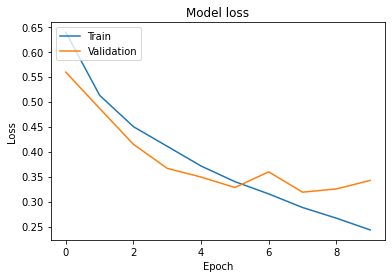

In [45]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [46]:
# Evaluate the model
score = model.evaluate(test_generator, steps=len(test_generator))
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

157/157 [==============================] - 26s 167ms/step - loss: 0.3424 - accuracy: 0.8594
Test Loss: 0.34236785769462585
Test Accuracy: 0.8594031929969788


In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [48]:
model.save('cat_dog_classifier.h5')

In [1]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('cat_dog_classifier.h5')  # Replace 'your_model_path' with the actual path to your saved model

# Define the Gradio interface
def predict_new_image(img):
    # Check if the input is a file (path) or a PIL Image object
    if isinstance(img, str):  # Assuming a string represents a file path
        # Load and preprocess the image
        img_path = img
        img = image.load_img(img_path, target_size=(150, 150))
    else:
        # Gradio provides the image as a PIL Image object
        img_path = "uploaded_image.jpg"
        img = img.resize((150, 150))  # Resize the image to the expected size
    
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make a prediction
    prediction = model.predict(img_array)

    # Convert the prediction to a human-readable label
    if prediction[0][0] > 0.5:
        label = "Dog"
    else:
        label = "Cat"

    return str(label)

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_new_image,
    inputs=gr.Image(type="pil", label="Upload Image", target_size=(150, 150)),
    outputs=gr.Textbox(),
    title="Cat and Dog Classifier"
)

# Launch the Gradio interface
iface.launch()


G:\Anaconda\lib\site-packages\gradio\deprecation.py:43: UserWarning: You have unused kwarg parameters in Image, please remove them: {'target_size': (150, 150)}
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
